ExcersiceFour

Esta practica tiene como objetivo:
El objetivo principal es reducir la dimensionalidad de un conjunto de imágenes, para disminuri el ruido y eliminar informacion redundante, antes de aplicar algoritmos de procesamiento de imagenes mas avanzados.

In [1]:
# Importar las bibliotecas necesarias
using Images, ImageIO, FileIO, LinearAlgebra, Plots

5-element Vector{Matrix{Gray{N0f8}}}:
 [Gray{N0f8}(0.769) Gray{N0f8}(0.769) … Gray{N0f8}(0.502) Gray{N0f8}(0.502); Gray{N0f8}(0.769) Gray{N0f8}(0.769) … Gray{N0f8}(0.49) Gray{N0f8}(0.502); … ; Gray{N0f8}(0.537) Gray{N0f8}(0.569) … Gray{N0f8}(0.439) Gray{N0f8}(0.455); Gray{N0f8}(0.522) Gray{N0f8}(0.557) … Gray{N0f8}(0.459) Gray{N0f8}(0.478)]
 [Gray{N0f8}(0.196) Gray{N0f8}(0.188) … Gray{N0f8}(0.012) Gray{N0f8}(0.012); Gray{N0f8}(0.251) Gray{N0f8}(0.247) … Gray{N0f8}(0.012) Gray{N0f8}(0.012); … ; Gray{N0f8}(0.58) Gray{N0f8}(0.58) … Gray{N0f8}(0.545) Gray{N0f8}(0.545); Gray{N0f8}(0.58) Gray{N0f8}(0.58) … Gray{N0f8}(0.541) Gray{N0f8}(0.541)]
 [Gray{N0f8}(0.522) Gray{N0f8}(0.522) … Gray{N0f8}(0.812) Gray{N0f8}(0.812); Gray{N0f8}(0.522) Gray{N0f8}(0.522) … Gray{N0f8}(0.812) Gray{N0f8}(0.812); … ; Gray{N0f8}(0.333) Gray{N0f8}(0.333) … Gray{N0f8}(0.22) Gray{N0f8}(0.224); Gray{N0f8}(0.318) Gray{N0f8}(0.318) … Gray{N0f8}(0.216) Gray{N0f8}(0.22)]
 [Gray{N0f8}(0.361) Gray{N0f8}(0.384) … Gray{N0f8}(0.624) Gray{N0f8}(0.647); Gray{N0f8}(0.373) Gray{N0f8}(0.392) … Gray{N0f8}(0.518) Gray{N0f8}(0.545); … ; Gray{N0f8}(0.588) Gray{N0f8}(0.588) … Gray{N0f8}(0.427) Gray{N0f8}(0.435); Gray{N0f8}(0.588) Gray{N0f8}(0.588) … Gray{N0f8}(0.439) Gray{N0f8}(0.447)]
 [Gray{N0f8}(0.384) Gray{N0f8}(0.365) … Gray{N0f8}(0.992) Gray{N0f8}(0.992); Gray{N0f8}(0.369) Gray{N0f8}(0.361) … Gray{N0f8}(0.992) Gray{N0f8}(0.992); … ; Gray{N0f8}(0.796) Gray{N0f8}(0.784) … Gray{N0f8}(0.859) Gray{N0f8}(0.843); Gray{N0f8}(0.8) Gray{N0f8}(0.796) … Gray{N0f8}(0.882) Gray{N0f8}(0.859)]
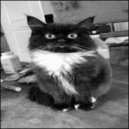
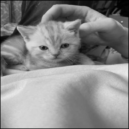
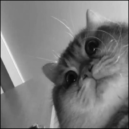
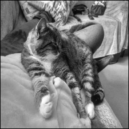
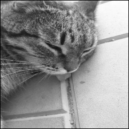

In [2]:
# Imagenes que se utilizaron para el analisis
# Las imagenes originalmente tienen un tamaño de 640x640
img_paths = ["C:\\Users\\Gustavo\\cats\\gato1.jpg", "C:\\Users\\Gustavo\\cats\\gato2.jpg", "C:\\Users\\Gustavo\\cats\\gato3.jpg", "C:\\Users\\Gustavo\\cats\\gato4.jpg", "C:\\Users\\Gustavo\\cats\\gato5.jpg"]
# Cargar y redimensionar las imágenes a 512x512 píxeles
imgs = [Gray.(imresize(load(img_path), (512, 512))) for  img_path in img_paths] 


Aplanamos cada imagen, convirtiéndola en un vector de una sola dimensión con el proposito de transformar las imágenes en un formato adecuado para PCA/SVD.

In [3]:
flattened_imgs = [vec(img) for img in imgs]

5-element Vector{Vector{Gray{N0f8}}}:
 [Gray{N0f8}(0.769), Gray{N0f8}(0.769), Gray{N0f8}(0.765), Gray{N0f8}(0.769), Gray{N0f8}(0.773), Gray{N0f8}(0.78), Gray{N0f8}(0.788), Gray{N0f8}(0.796), Gray{N0f8}(0.804), Gray{N0f8}(0.804)  …  Gray{N0f8}(0.384), Gray{N0f8}(0.408), Gray{N0f8}(0.388), Gray{N0f8}(0.388), Gray{N0f8}(0.365), Gray{N0f8}(0.361), Gray{N0f8}(0.38), Gray{N0f8}(0.416), Gray{N0f8}(0.455), Gray{N0f8}(0.478)]
 [Gray{N0f8}(0.196), Gray{N0f8}(0.251), Gray{N0f8}(0.333), Gray{N0f8}(0.341), Gray{N0f8}(0.322), Gray{N0f8}(0.231), Gray{N0f8}(0.204), Gray{N0f8}(0.271), Gray{N0f8}(0.349), Gray{N0f8}(0.451)  …  Gray{N0f8}(0.569), Gray{N0f8}(0.561), Gray{N0f8}(0.557), Gray{N0f8}(0.557), Gray{N0f8}(0.557), Gray{N0f8}(0.561), Gray{N0f8}(0.561), Gray{N0f8}(0.553), Gray{N0f8}(0.545), Gray{N0f8}(0.541)]
 [Gray{N0f8}(0.522), Gray{N0f8}(0.522), Gray{N0f8}(0.522), Gray{N0f8}(0.522), Gray{N0f8}(0.522), Gray{N0f8}(0.522), Gray{N0f8}(0.522), Gray{N0f8}(0.522), Gray{N0f8}(0.522), Gray{N0f8}(0.522)  … 

Creamos la matriz de datos data_matrix donde cada fila representa una imagen para organizar los datos para el análisis PCA/SVD.

In [4]:
# Crear una matriz donde cada fila es una imagen (vector)
data_matrix = reduce(hcat, flattened_imgs)' 

Aplicamos la descomposición en valores singulares (SVD) a la matriz de datos para obtener los componentes principales que capturan la mayor varianza en los datos.

In [5]:
# Calcular la descomposición en valores singulares (SVD)
U, S, V = svd(data_matrix)

k = 2  # Número de componentes principales
reduced_data = U[:, 1:k]

5×2 Matrix{Float32}:
 -0.382287   0.87463
 -0.474447  -0.279364
 -0.421331   0.0741701
 -0.443227  -0.0964199
 -0.504764  -0.377068

Graficamos las imágenes en un espacio 2D utilizando las dos primeras componentes principales para visualizar cómo se agrupan las imágenes en el espacio de componentes principales.

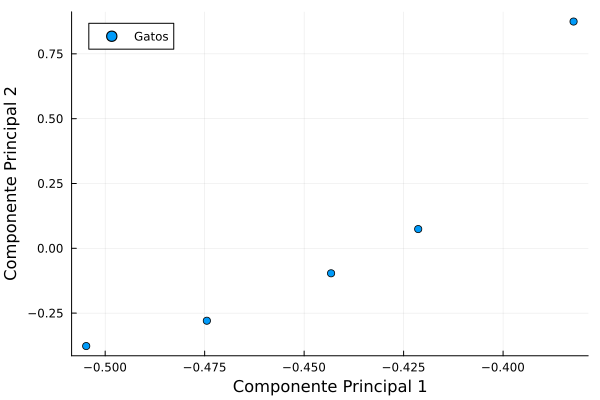

In [6]:
# Graficar las imágenes en un espacio 2D usando las componentes principales
scatter(reduced_data[:, 1], reduced_data[:, 2], label="Gatos")
xlabel!("Componente Principal 1")
ylabel!("Componente Principal 2")